# Golf Handicap Tracker

### Data Creation

##### This notebook will be used to generate synthetic data and lay the groundwork for how real data will be stored and updated

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

%matplotlib inline
pd.set_option("display.max_rows", None)

import warnings

warnings.filterwarnings("ignore")

import inspect

In [2]:
from utils import add_round, generate_data, get_handicaps, fill_handicaps, plot_statistics, histplot, pie_chart, dist_plot, \
rolling_avg, scatter, mean_med_stats, find_round, handicap_differentials, total_profit, agg_features_by_cat

<hr style="border: 3px solid blue">

# Data Generation

In [3]:
df = pd.DataFrame(columns=["name", "date", "adj_gross_score", "course_rating", "slope_rating", "handicap_diff",
                           "putts", "3_putts", "fairways_hit", "gir", "penalty/ob", "birdies", "trpl_bogeys_plus", 
                           "profit/loss", "match_format", "golf_course", "opponent/s", "notes"])

In [4]:
df.head()

Empty DataFrame
Columns: [name, date, adj_gross_score, course_rating, slope_rating, handicap_diff, putts, 3_putts, fairways_hit, gir, penalty/ob, birdies, trpl_bogeys_plus, profit/loss, match_format, golf_course, opponent/s, notes]
Index: []

In [5]:
# Testing Function

df.loc[len(df)] = add_round(name="Dave", date="2024-07-22", adj_gross_score=80, course_rating=72, slope_rating=113, putts=36,
                            three_putts=0, fairways=6, gir=12, penalties=1, birdies=2, trpl_bogeys_plus=1, profit_loss=2.5, 
                            match_format="Skins", golf_course="Hollybrook", opponent_s="Pete", notes="I played well enough to win while Pete played badly",
                            calc_diff=False)
df.shape

(1, 18)

In [6]:
# Inspection
df.head()

name       date  adj_gross_score  course_rating  slope_rating  \
0  Dave 2024-07-22               80             72           113   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0            NaN     36        0             6   12           1        2   

   trpl_bogeys_plus  profit/loss match_format golf_course opponent/s  \
0                 1          2.5        Skins  Hollybrook       Pete   

                                               notes  
0  I played well enough to win while Pete played ...

In [7]:
# Generate synthetic data
generate_data(df)
df.shape

(501, 18)

In [8]:
df.head()

name       date  adj_gross_score  course_rating  slope_rating  \
0  Dave 2024-07-22               80           72.0           113   
1  Pete 2024-07-28               88           71.0           120   
2  Pete 2024-07-31               89           71.5           112   
3  Pete 2024-08-03              102           72.0           111   
4  Pete 2024-08-03               86           73.5           119   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0            NaN     36        0             6   12           1        2   
1            NaN     33        5             2    2          14        0   
2            NaN     35        7             0    1          10        2   
3            NaN     31        5             3    0          10        0   
4            NaN     35        6             0    6           7        1   

   trpl_bogeys_plus  profit/loss match_format       golf_course opponent/s  \
0                 1          2.5        Skins        Hollybrook       Pete   
1                 0         -0.5         Dots        Hollybrook        Doc   
2                 0          1.5        Skins    Bethpage Black        Doc   
3                 0          2.0        Skins  Augusta National       Eric   
4                 0         -0.5   Match Play      Pebble Beach       Fred   

                                               notes  
0  I played well enough to win while Pete played ...  
1                                      I got unlucky  
2                                     I played badly  
3                                     I played badly  
4                                     I played badly

In [9]:
# Generate new column
df["handicap_diff"] = handicap_differentials(df)
df[["name", "date", "handicap_diff"]].head(10)

name       date  handicap_diff
0  Dave 2024-07-22       8.000000
1  Pete 2024-07-28      16.008333
2  Pete 2024-07-31      17.656250
3  Pete 2024-08-03      30.540541
4  Pete 2024-08-03      11.869748
5  Pete 2024-08-09       3.268595
6  Pete 2024-08-07      11.589744
7  Pete 2024-08-09      20.377049
8  Pete 2024-08-11      12.107143
9  Pete 2024-08-21      11.035156

In [10]:
# Populate Handicap Column
df = get_handicaps(df)

In [11]:
# Check group handicaps
df.groupby("name")["handicap"].last()

name
Dave    4.812673
Doc     1.839331
Eric    3.896409
Fred    7.277745
Pete    9.285368
Name: handicap, dtype: float64

In [12]:
# Inspection
print(df.shape)
df.head(10)

(501, 19)


name       date  adj_gross_score  course_rating  slope_rating  \
0    Dave 2024-07-22               80           72.0           113   
1    Pete 2024-07-28               88           71.0           120   
201  Eric 2024-07-28               72           72.0           125   
301  Fred 2024-07-28               86           71.0           112   
101  Dave 2024-07-28               88           72.5           112   
401   Doc 2024-07-28               77           71.5           127   
102  Dave 2024-07-30               81           73.5           110   
402   Doc 2024-07-30               82           72.0           115   
2    Pete 2024-07-31               89           71.5           112   
202  Eric 2024-07-31               86           72.5           119   

     handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0         8.000000     36        0             6   12           1        2   
1        16.008333     33        5             2    2          14        0   
201       0.000000     23        0             2    9           0        0   
301      15.133929     18        3            10   10           1        0   
101      15.638393     29        3             7    0           8        0   
401       4.893701     38        9            12   12           7        0   
102       7.704545     18        1             8    1           7        2   
402       9.826087     38        7            11   12           1        0   
2        17.656250     35        7             0    1          10        2   
202      12.819328     33        2             8   11           1        1   

     trpl_bogeys_plus  profit/loss match_format        golf_course opponent/s  \
0                   1          2.5        Skins         Hollybrook       Pete   
1                   0         -0.5         Dots         Hollybrook        Doc   
201                 1          0.0        Skins     Bethpage Black       Dave   
301                 1          0.5  Stroke Play         Hollybrook       Pete   
101                 0          1.0        Skins          Pinehurst       Eric   
401                 0          2.0         Dots  Whistling Straits       Dave   
102                 1         -1.5        Skins     Bethpage Black       Eric   
402                 1          0.0  Stroke Play     Bethpage Black       Fred   
2                   0          1.5        Skins     Bethpage Black        Doc   
202                 1          1.5         Dots     Bethpage Black        Doc   

                                                 notes  handicap  
0    I played well enough to win while Pete played ...       NaN  
1                                        I got unlucky       NaN  
201                                     I played badly       NaN  
301                              The golf Gods hate me       NaN  
101                              The golf Gods hate me       NaN  
401                                      I got unlucky       NaN  
102                                      I played well  5.396364  
402                                      I got unlucky       NaN  
2                                       I played badly       NaN  
202                                        I got lucky       NaN

<hr style="border:3px solid blue">

# Demonstration of Plotting Functions 

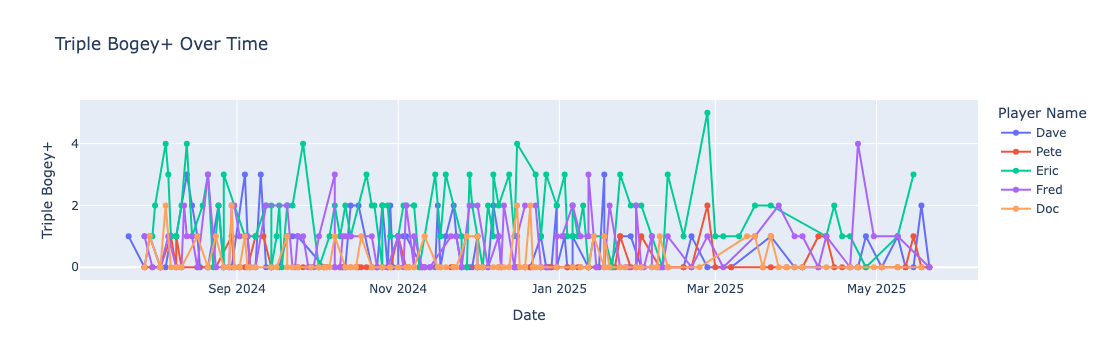

In [13]:
# Plotting handicap over time
plot_statistics(df, 'trpl_bogeys_plus')

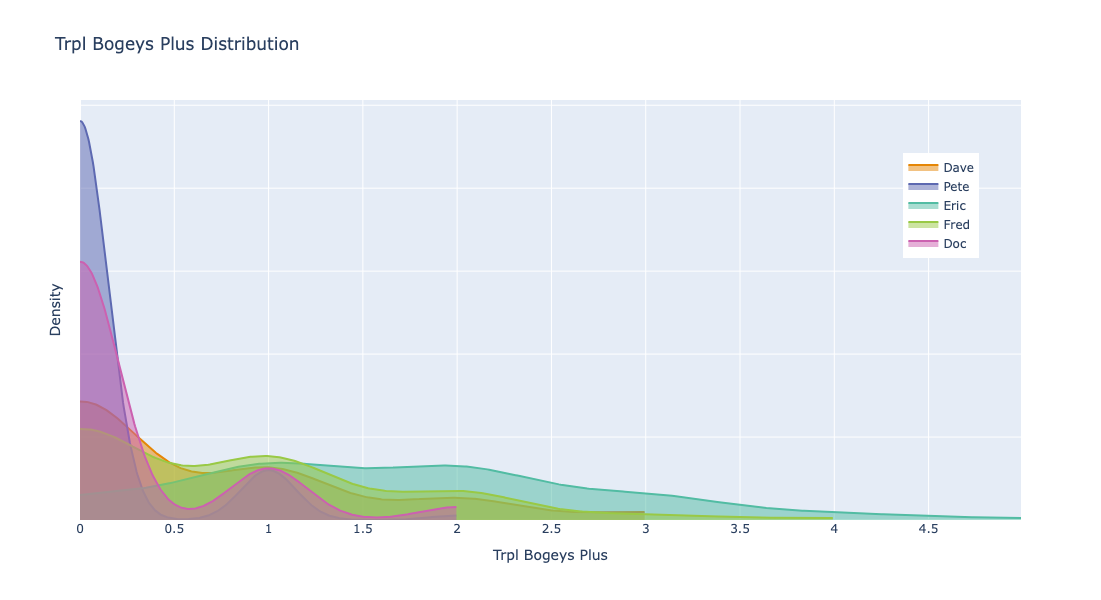

In [14]:
# Plot distributions using KDE
dist_plot(df, "trpl_bogeys_plus")

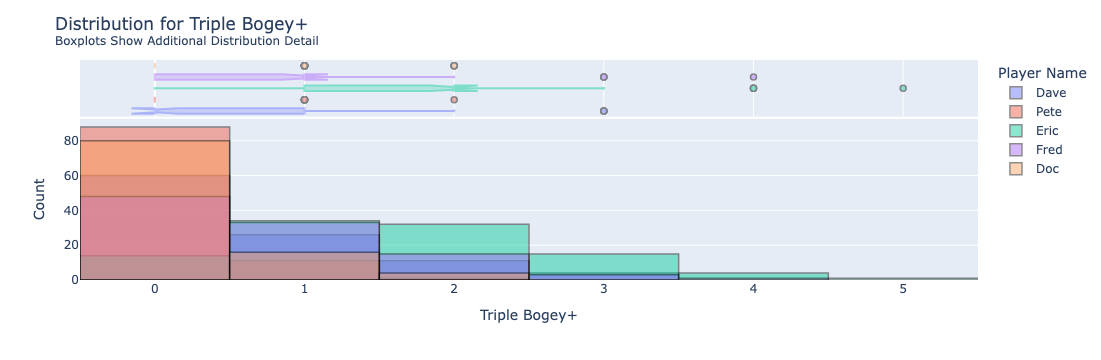

In [15]:
# Plot distributions using histogram with boxplot in the margin
histplot(df, "trpl_bogeys_plus")

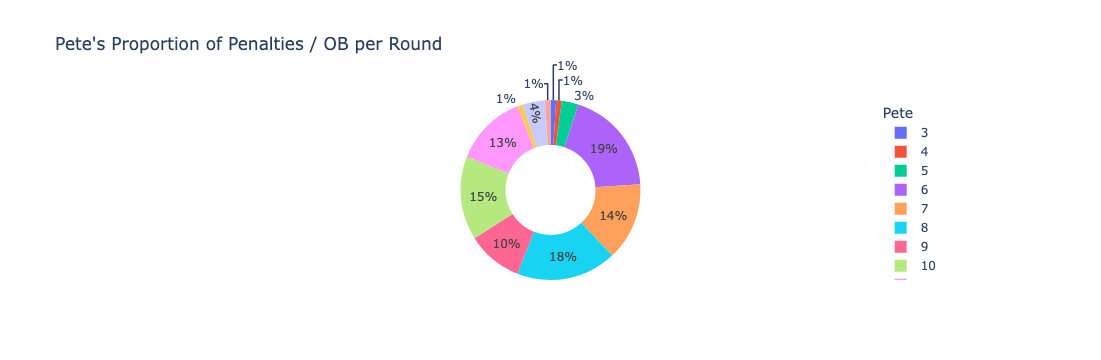

In [16]:
# Example pie chart
pie_chart(df, "penalty/ob", "Pete")

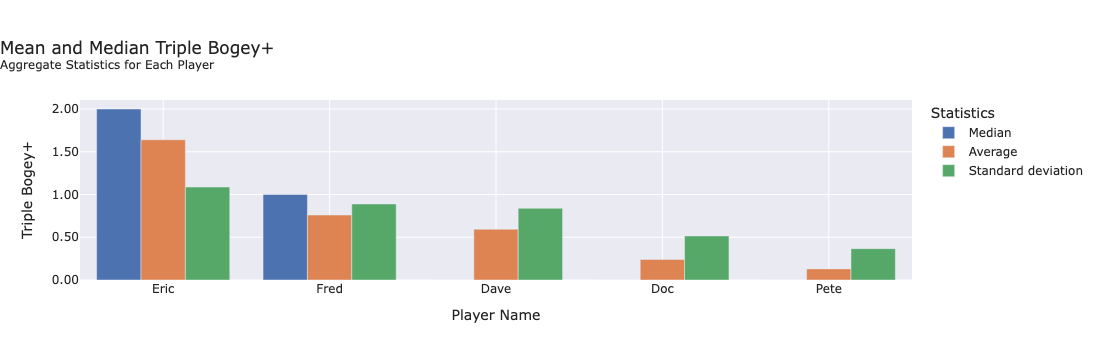

In [17]:
# Aggregate statistics for adjusted gross score
mean_med_stats(df, "trpl_bogeys_plus")

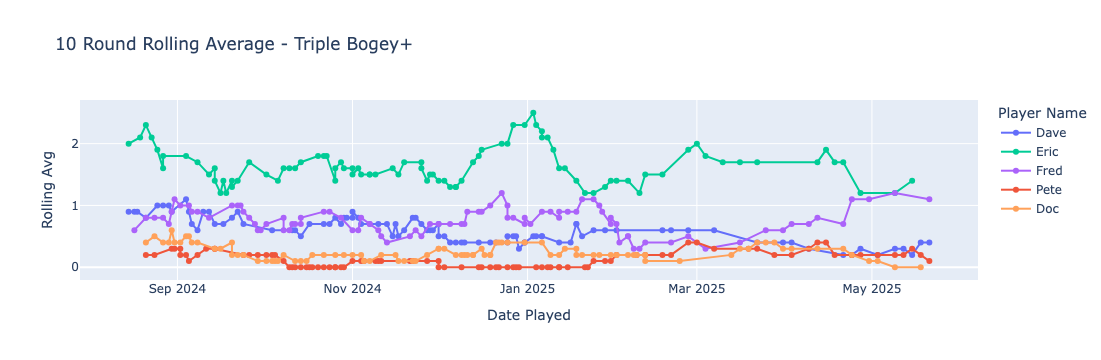

In [18]:
# Plot rolling averages based on specified window
rolling_avg(df, "trpl_bogeys_plus", 10)

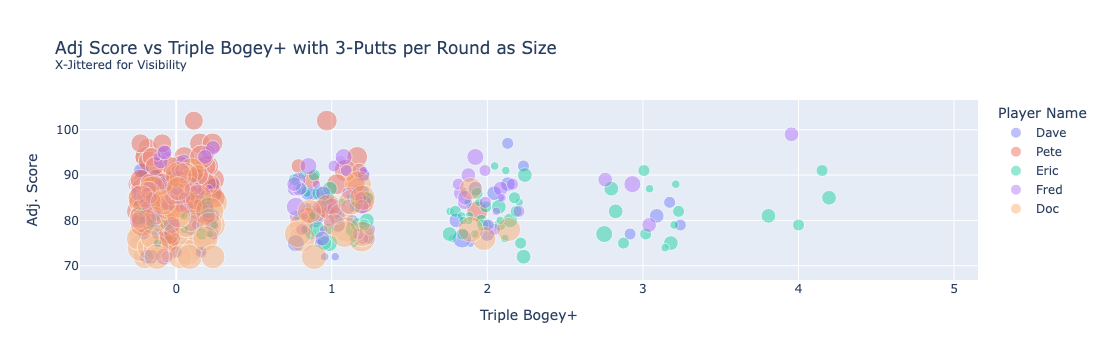

In [19]:
# Scatter plot of adjusted gross score vs penalty strokes with 3-putts as a size variable
scatter(df,"trpl_bogeys_plus", size="3_putts")

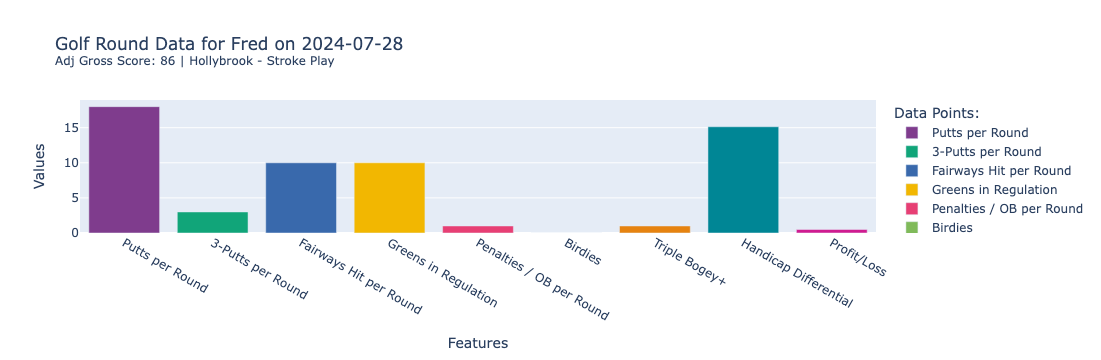

In [21]:
find_round(data=df, date=pd.to_datetime("2024-07-28"), name="Fred")

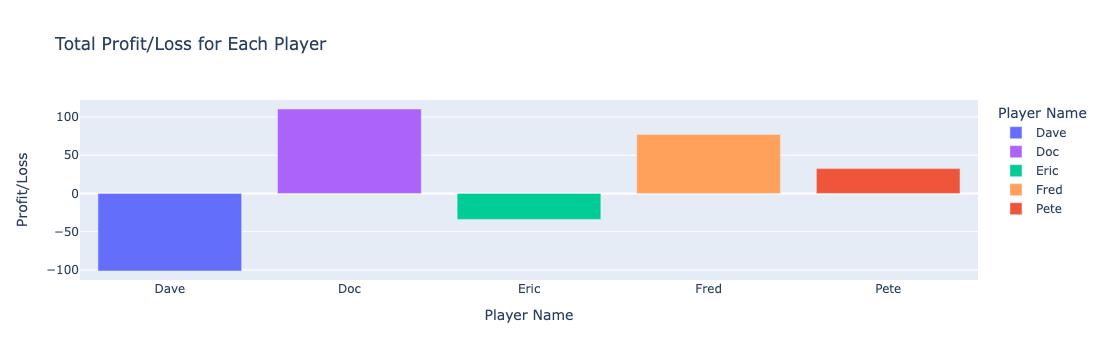

In [22]:
total_profit(df)

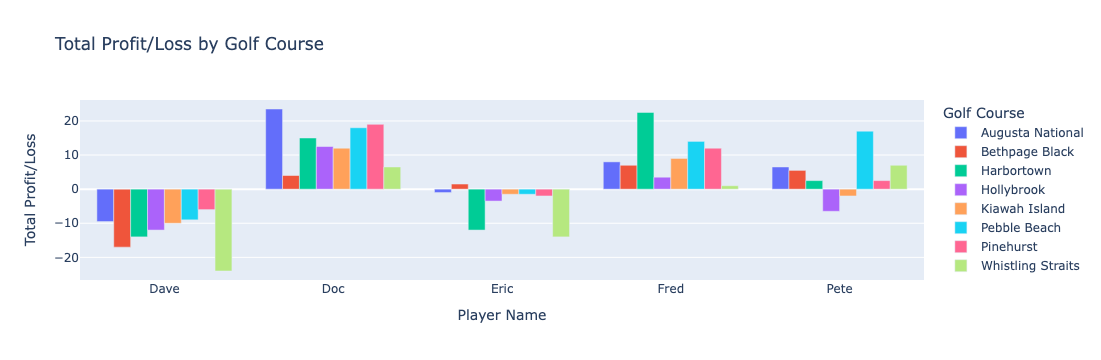

In [24]:
agg_features_by_cat(df, "golf_course", "profit/loss", "sum")

<hr style= "border: 3px solid blue">

# File Serialization

In [26]:
# Save synthetic data
df.to_csv("synthetic_data.csv", index=False)

In [38]:
# Verify save quality 
pd.read_csv("synthetic_data.csv").head(9)

name        date  adj_gross_score  course_rating  slope_rating  \
0  Dave  2024-07-22               80           72.0           113   
1   Doc  2024-07-27               80           73.5           117   
2  Eric  2024-07-27               85           73.0           122   
3  Fred  2024-07-27               89           72.5           118   
4  Dave  2024-07-27               73           73.5           125   
5  Pete  2024-07-27               91           73.0           110   
6  Pete  2024-07-29               79           73.5           114   
7  Fred  2024-07-29               86           73.5           124   
8   Doc  2024-07-29               79           73.0           119   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0       8.000000     36        0             6   12           1        2   
1       6.277778     24        4            10    7           3        0   
2      11.114754     29        1             7    1           2        0   
3      15.800847     36        5            11    1           0        1   
4      -0.452000     29        5             2   12           3        1   
5      18.490909     43        0             2    1           8        1   
6       5.451754     45        0             1    6          10        0   
7      11.391129     20        6             7    0           4        1   
8       5.697479     19        4             7    8           8        0   

   trpl_bogeys_plus  profit/loss match_format        golf_course opponent/s  \
0                 1          2.5        Skins         Hollybrook       Pete   
1                 0         -1.0        Skins  Whistling Straits       Dave   
2                 0          0.5         Dots     Bethpage Black       Fred   
3                 1         -1.0   Match Play          Pinehurst       Pete   
4                 0          1.5        Skins         Harbortown        Doc   
5                 0         -1.0        Skins         Hollybrook        Doc   
6                 1         -1.5        Skins  Whistling Straits       Dave   
7                 0         -0.5   Match Play       Pebble Beach       Eric   
8                 2         -0.5   Match Play     Bethpage Black       Dave   

                                               notes  handicap  
0  I played well enough to win while Pete played ...       NaN  
1                                      I played well       NaN  
2                                        I got lucky       NaN  
3                                        I got lucky       NaN  
4                                     I played badly       NaN  
5                                        I got lucky       NaN  
6                                      I got unlucky       NaN  
7                                     I played badly       NaN  
8                                      I played well       NaN

In [29]:
# Copied a table from a browser
equitable_df = pd.read_clipboard()

In [31]:
# Save to file
equitable_df.to_csv("ESC.csv", index=False)

In [33]:
# Verify
pd.read_csv("ESC.csv").head()

Course Handicap Maximum Number on Any Hole
0       9 or less               Double Bogey
1   10 through 19                          7
2   20 through 29                          8
3   30 through 39                          9
4      40 or more                         10

In [35]:
# Create an additional table for handicap calculation rules

handicap_rds = pd.DataFrame(columns=["Recorded Rounds", "Differentials to Use", "Adjustment"])

handicap_rds.loc[len(handicap_rds)] =["3", "Lowest 1", -2.0]
handicap_rds.loc[len(handicap_rds)] =["4", "Lowest 1", -1.0]
handicap_rds.loc[len(handicap_rds)] =["5", "Lowest 1", 0]
handicap_rds.loc[len(handicap_rds)] =["6", "Average of lowest 2", -1.0]
handicap_rds.loc[len(handicap_rds)] =["7 or 8", "Average of lowest 2", 0]
handicap_rds.loc[len(handicap_rds)] =["9 to 11", "Average of lowest 3", 0]
handicap_rds.loc[len(handicap_rds)] =["12 to 14", "Average of lowest 4", 0]
handicap_rds.loc[len(handicap_rds)] =["15 or 16", "Average of lowest 5", 0]
handicap_rds.loc[len(handicap_rds)] =["17 or 18", "Average of lowest 6", 0]
handicap_rds.loc[len(handicap_rds)] =["19", "Average of lowest 7", 0]
handicap_rds.loc[len(handicap_rds)] =["20", "Average of lowest 8", 0]

In [37]:
# Save to file
handicap_rds.to_csv("handicap_rds.csv", index=False)

In [34]:
# Verify
pd.read_csv("handicap_rds.csv").head()

Recorded Rounds Differentials to Use  Adjustment
0               3             Lowest 1        -2.0
1               4             Lowest 1        -1.0
2               5             Lowest 1         0.0
3               6  Average of lowest 2        -1.0
4          7 or 8  Average of lowest 2         0.0

<hr style="border: 3px solid blue">

# Real Dataframe Creation

In [26]:
df = pd.DataFrame(columns=["name", "date", "adj_gross_score", "course_rating", "slope_rating", "handicap_diff",
                           "putts", "3_putts", "fairways_hit", "gir", "penalty/ob", "birdies", "trpl_bogeys_plus", 
                           "profit/loss", "match_format", "golf_course", "opponent/s", "notes"])

df.to_csv("real_data.csv", index=False)

### Add new rounds to the csv file:

In [34]:
# Cell for adding new data 
df = pd.read_csv("real_data.csv", parse_dates=["date"])

# Add round notes here
notes = """Struggled to handle tee shots with left -> right wind, I'd have more 3-putts if we counted putting from the fringe, 
short game was poor, one very poor tee shot with 4-iron when I tried to hover the club"""

# Add round stats and info here
df.loc[len(df)] = add_round(name="Dave", date="2024-07-26", adj_gross_score=87, course_rating=71.9, slope_rating=134, putts=34,
                            three_putts=2, fairways=1, gir=6, penalties=0, birdies=1, trpl_bogeys_plus=0, profit_loss=11, 
                            match_format="Skins | Dots", golf_course="Hollybrook", opponent_s="Pete", notes=notes,
                            calc_diff=True)

# Populate Handicap Column
df = get_handicaps(df)

df.to_csv("real_data.csv", index=False)
df.head()

name       date  adj_gross_score  course_rating  slope_rating  \
0  Pete 2024-07-26              101           71.9           134   
1  Dave 2024-07-26               87           71.9           134   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0      24.539552     31        0             0    1           5        0   
1      12.733582     34        2             1    6           0        1   

   trpl_bogeys_plus  profit/loss  match_format golf_course opponent/s  \
0                 4          -11  Skins | Dots  Hollybrook       Dave   
1                 0           11  Skins | Dots  Hollybrook       Pete   

                                               notes  handicap  
0  Pete had difficulty managing the heat, sweat, ...       NaN  
1  Struggled to handle tee shots with left -> rig...       NaN

### Cell to investigate the data

In [39]:
df = pd.read_csv("real_data.csv", parse_dates=["date"])
df.head()

name       date  adj_gross_score  course_rating  slope_rating  \
0  Pete 2024-07-26              101           71.9           134   
1  Dave 2024-07-26               87           71.9           134   

   handicap_diff  putts  3_putts  fairways_hit  gir  penalty/ob  birdies  \
0      24.539552     31        0             0    1           5        0   
1      12.733582     34        2             1    6           0        1   

   trpl_bogeys_plus  profit/loss  match_format golf_course opponent/s  \
0                 4          -11  Skins | Dots  Hollybrook       Dave   
1                 0           11  Skins | Dots  Hollybrook       Pete   

                                               notes  handicap  
0  Pete had difficulty managing the heat, sweat, ...       NaN  
1  Struggled to handle tee shots with left -> rig...       NaN